#DATA PREPROCESSING

#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from scipy.special import inv_boxcox1p
from IPython.display import FileLink
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout ,Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import plot_model
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from pandas.plotting import parallel_coordinates
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

import warnings





In [ ]:
df=pd.read_csv("WSN-DS.csv")   #read the data

In [ ]:
df.columns = df.columns.str.strip()   #rename the columns so there will be no spaces
df

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Consumed Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,Normal
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,Normal
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,Normal
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,Normal


In [ ]:
df_select = df[['Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Attack type' , 'Consumed Energy']]


In [ ]:
missing_values =df_select.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Is_CH              0
ADV_S              0
ADV_R              0
SCH_S              0
SCH_R              0
DATA_S             0
DATA_R             0
Data_Sent_To_BS    0
Attack type        0
Consumed Energy    0
dtype: int64


In [ ]:
df_select.columns

Index(['Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R',
       'Data_Sent_To_BS', 'Attack type', 'Consumed Energy'],
      dtype='object')

In [ ]:
df_select.shape

(374661, 10)

In [ ]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Is_CH            374661 non-null  int64  
 1   ADV_S            374661 non-null  int64  
 2   ADV_R            374661 non-null  int64  
 3   SCH_S            374661 non-null  int64  
 4   SCH_R            374661 non-null  int64  
 5   DATA_S           374661 non-null  int64  
 6   DATA_R           374661 non-null  int64  
 7   Data_Sent_To_BS  374661 non-null  int64  
 8   Attack type      374661 non-null  object 
 9   Consumed Energy  374661 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 28.6+ MB


In [ ]:
df_select.head()

,Is_CH,ADV_S,ADV_R,SCH_S,SCH_R,DATA_S,DATA_R,Data_Sent_To_BS,Attack type,Consumed Energy
0,1,1,0,1,0,0,1200,48,Normal,2.46940
1,0,0,4,0,1,38,0,0,Normal,0.06957
2,0,0,4,0,1,41,0,0,Normal,0.06898
3,0,0,4,0,1,38,0,0,Normal,0.06673
4,0,0,4,0,1,41,0,0,Normal,0.06534


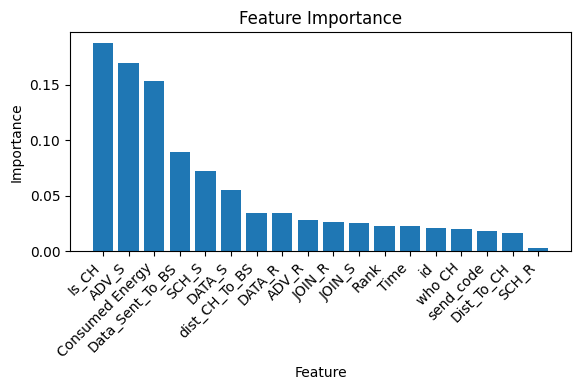

In [ ]:
#Feature Selection Using Randomforest Model

target_column = 'Attack type'


X = df.drop(target_column, axis=1)
y = df[target_column]

# Ensure that X contains only numeric columns
X_numeric = X.select_dtypes(include=['number'])


X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_numeric.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using a bar chart
plt.figure(figsize=(6,4))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
# Feature selection using Information Gain
target_column = 'Attack type'

# Convert the target column to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df[target_column])

# Split the data into features (X) and the target variable (y)
X = df.drop(target_column, axis=1)
X_numeric = X.select_dtypes(include=['number'])

# Calculate information gain for each feature
information_gain = mutual_info_classif(X_numeric, y_encoded)

# Create a DataFrame to store feature names and their information gain scores
information_gain_df = pd.DataFrame({'Feature': X_numeric.columns, 'Information Gain': information_gain})

# Sort the DataFrame by information gain in descending order
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)

# Display selected features based on information gain
selected_features_info_gain = information_gain_df.head(10)['Feature'].tolist()
print("Selected Features based on Information Gain:")
print(selected_features_info_gain)


Selected Features based on Information Gain:
['ADV_S', 'Consumed Energy', 'Is_CH', 'JOIN_S', 'SCH_R', 'DATA_S', 'Rank', 'send_code', 'Dist_To_CH', 'ADV_R']


In [ ]:
information_gain_df.head(10)

,Feature,Information Gain
5,ADV_S,0.271689
17,Consumed Energy,0.243304
2,Is_CH,0.242486
7,JOIN_S,0.233198
10,SCH_R,0.203818
12,DATA_S,0.192712
11,Rank,0.164346
16,send_code,0.159945
4,Dist_To_CH,0.151737
6,ADV_R,0.132523


#STUDYING THE DATA

##EDA

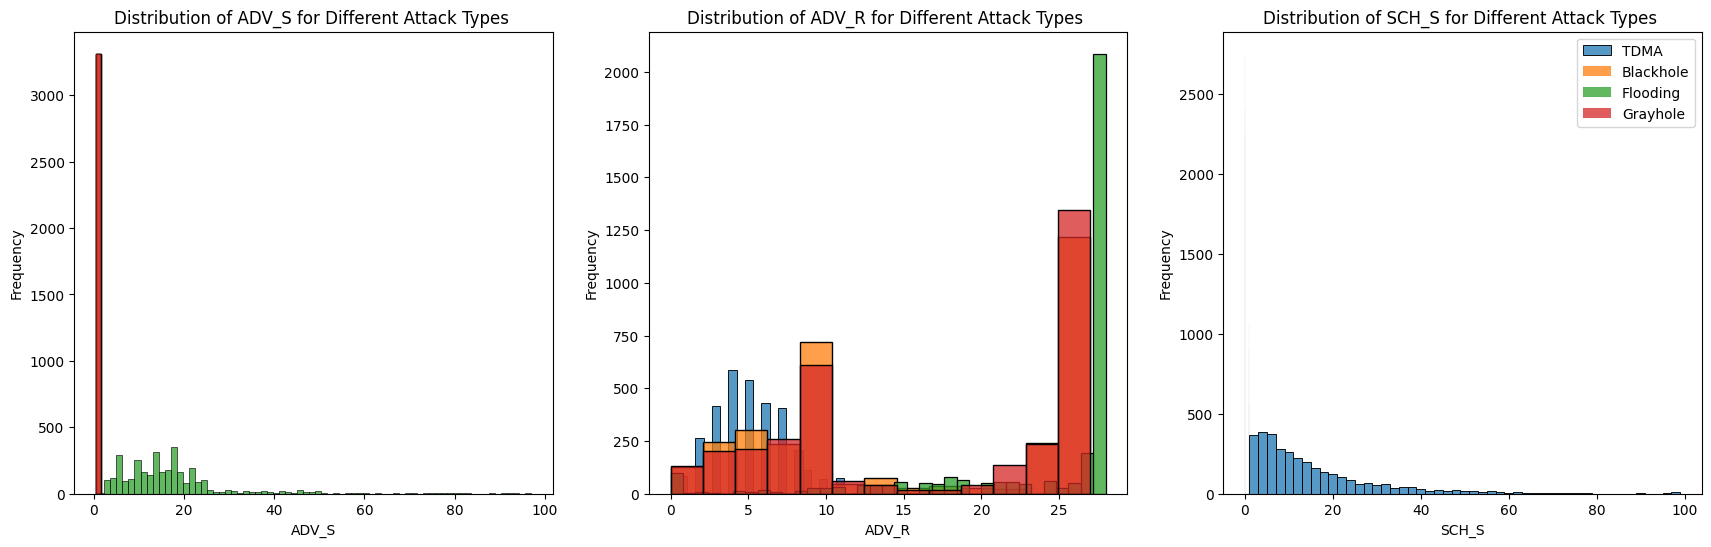

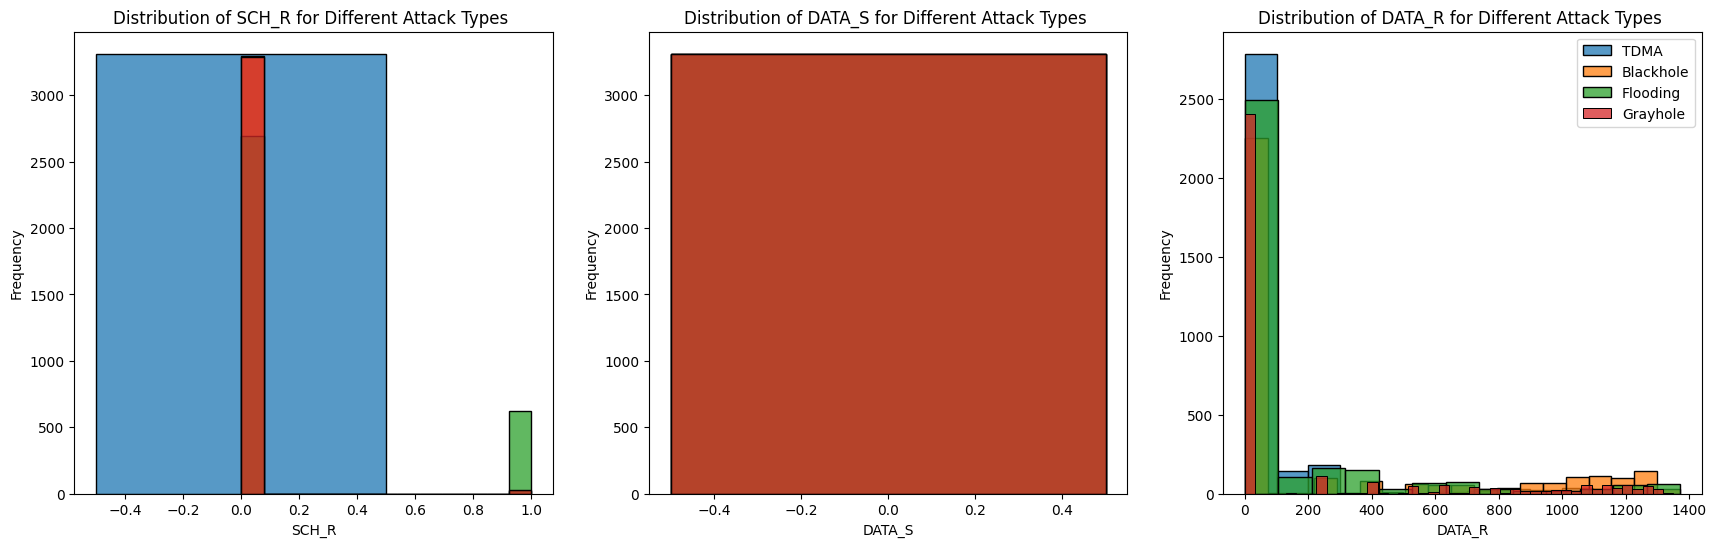

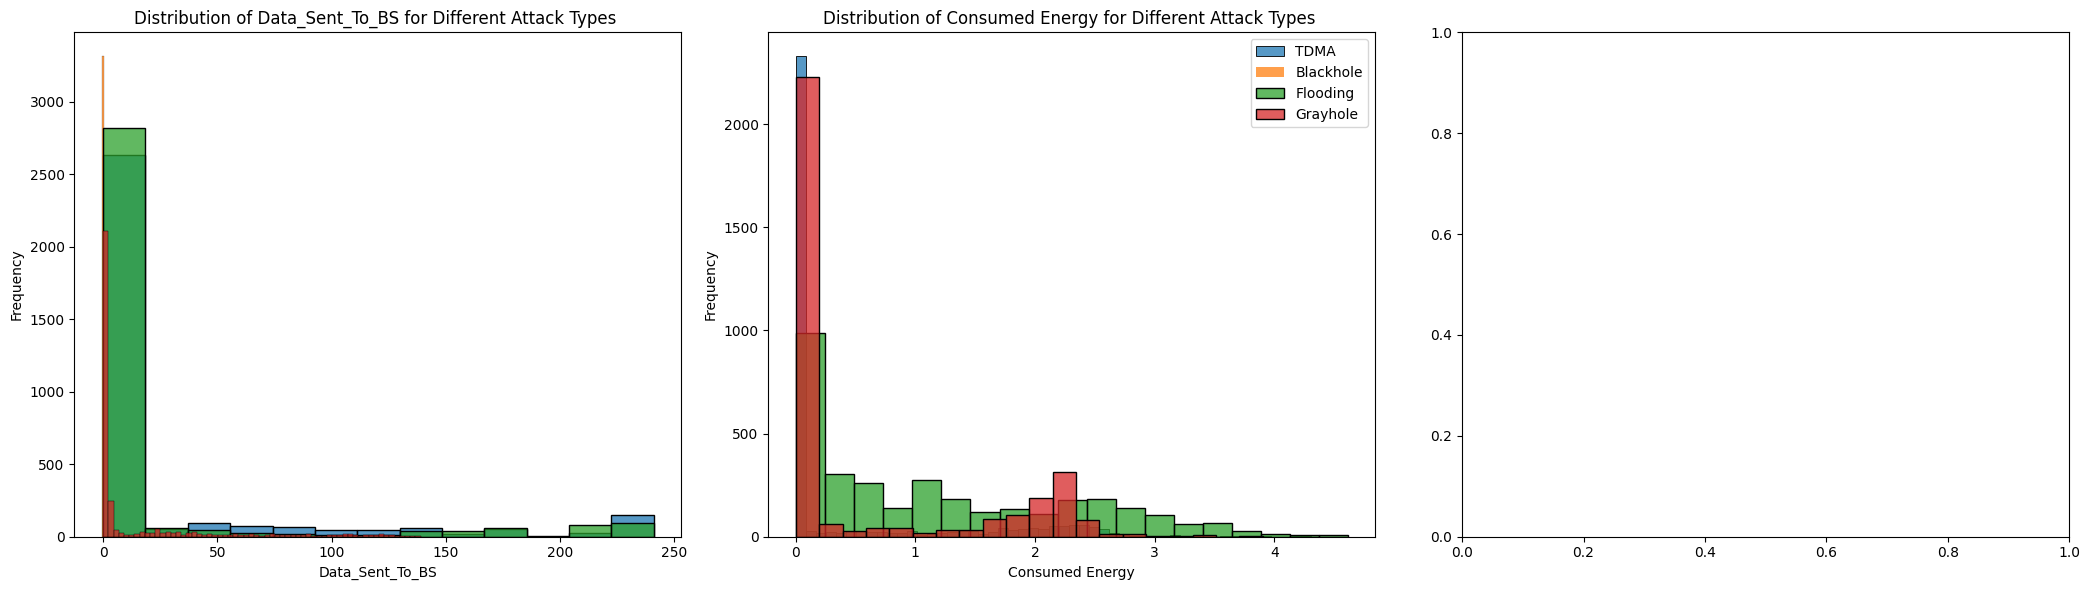

In [ ]:
'''A visual overview of the distribution of our features across different types of  attacks. This type
 of analysis can help in understanding the characteristics of the data and identifying potential patterns or anomalies associated with different attack types.'''
# Ignore future and user warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


df_select1 = df[[ 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy', 'Attack type']]
attack_types = ['TDMA', 'Blackhole', 'Flooding', 'Grayhole']

# number of plots per row
plots_per_row = 3

# Number of observations to include for each attack type
observations_per_attack_type = 3312

# Loop through each feature and create plots for each 'Attack type'
for i, feature in enumerate(df_select1.columns[:-1]):  # Exclude the last column ('Attack type')
    if i % plots_per_row == 0:
        fig, axes = plt.subplots(1, plots_per_row, figsize=(21, 6))
    for j, attack_type in enumerate(attack_types):
        # Filter the data for the specified number of observations for each attack type
        subset_data = df_select1[df_select1['Attack type'] == attack_type].head(observations_per_attack_type)
        sns.histplot(subset_data[feature], label=attack_type, kde=False, ax=axes[i % plots_per_row])
    axes[i % plots_per_row].set_title(f'Distribution of {feature} for Different Attack Types ')
    axes[i % plots_per_row].set_xlabel(feature)
    axes[i % plots_per_row].set_ylabel('Frequency')
    if i % plots_per_row == plots_per_row - 1 or i == len(df_select1.columns[:-1]) - 1:
        # If it's the last plot in the row or the last overall, show legend
        axes[i % plots_per_row].legend()

# Ensure tight layout for the last row
plt.tight_layout()
plt.show()


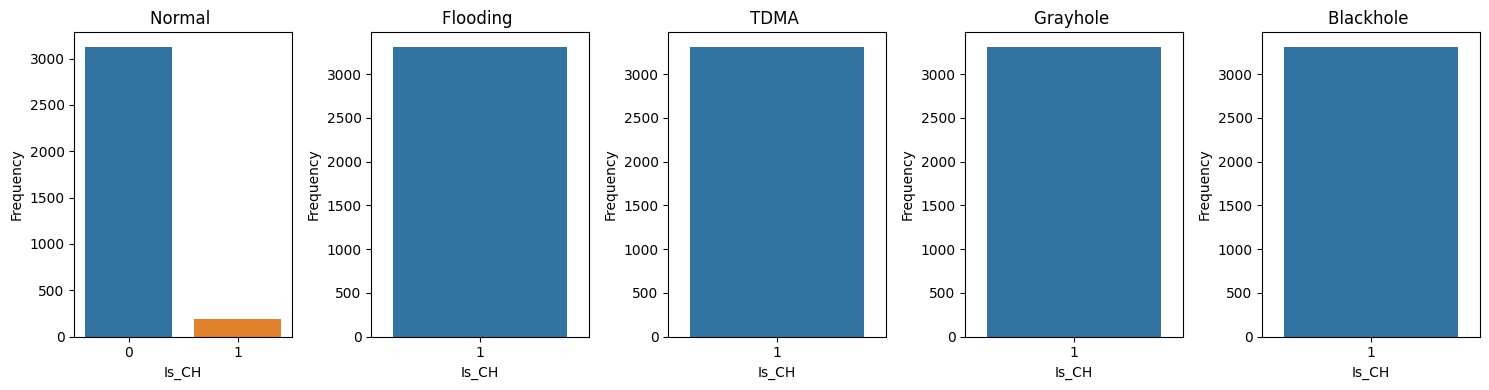

In [ ]:
#how the  feature 'Is_CH' is distributed across different categories of network attacks
# to understand the distribution of 'Is_CH' in the context of different attack scenarios.

warnings.simplefilter(action='ignore', category=FutureWarning)                  #to delete unwanted messages that comes with the output
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312                                                     #3312 sample from each attack to compare between balanced features

# Set up subplots
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))

# Plot the distribution of 'Is_CH' for each category in 'Attack type'
for i, attack_type in enumerate(df['Attack type'].unique()):
    # Filter the data for the specified number of samples for each category
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)

    # Plot count plot
    sns.countplot(x='Is_CH', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('Is_CH')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


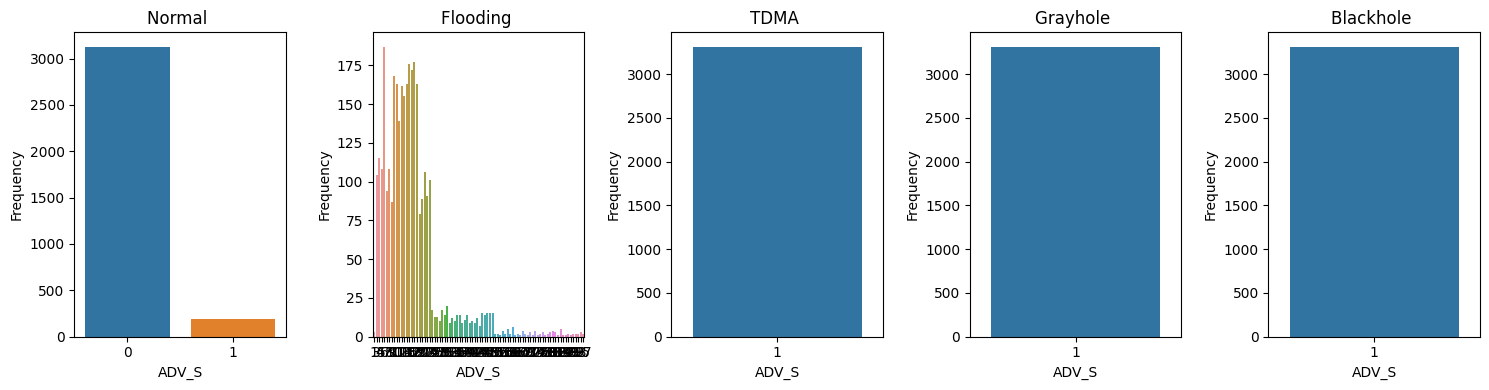

In [ ]:
#how the  feature 'ADV_S' is distributed across different categories of network attacks
# to understand the distribution of 'ADV_S' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='ADV_S', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('ADV_S')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


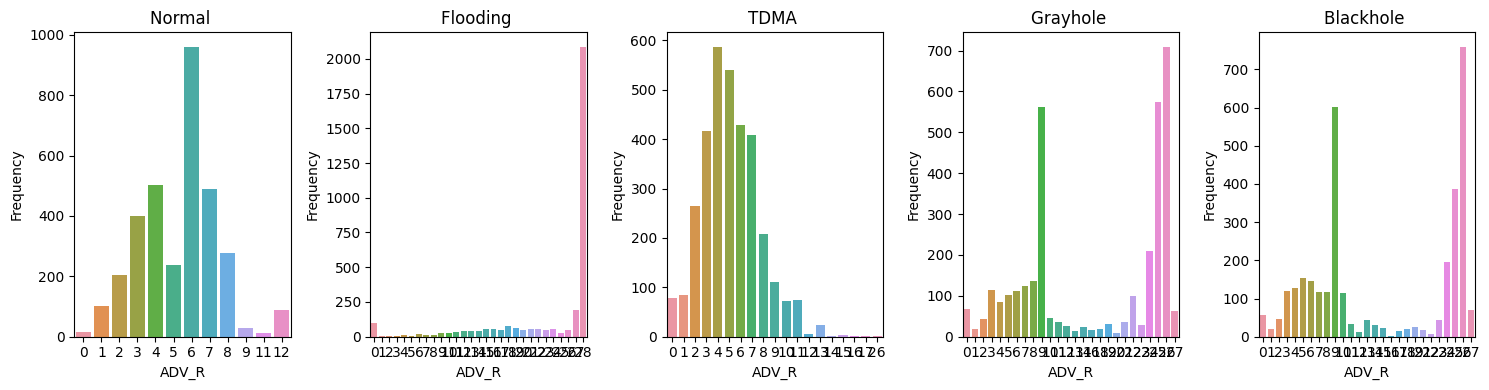

In [ ]:
#how the  feature 'ADV_R' is distributed across different categories of network attacks
# to understand the distribution of 'ADV_R' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='ADV_R', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('ADV_R')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


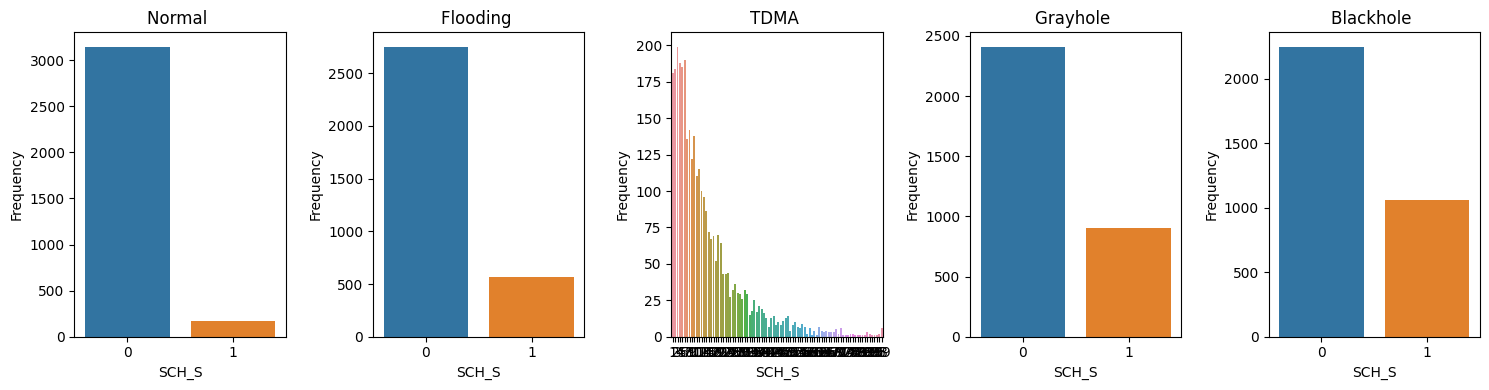

In [ ]:
#how the  feature 'SCH_S' is distributed across different categories of network attacks
# to understand the distribution of 'SCH_S' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='SCH_S', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('SCH_S')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


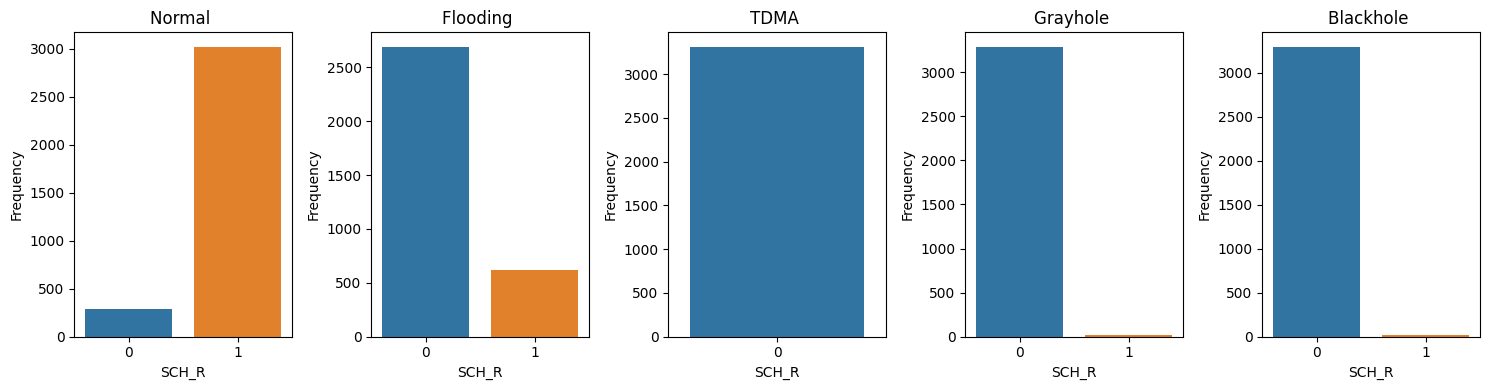

In [ ]:
#how the  feature 'SCH_R' is distributed across different categories of network attacks
# to understand the distribution of 'SCH_R' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='SCH_R', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('SCH_R')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


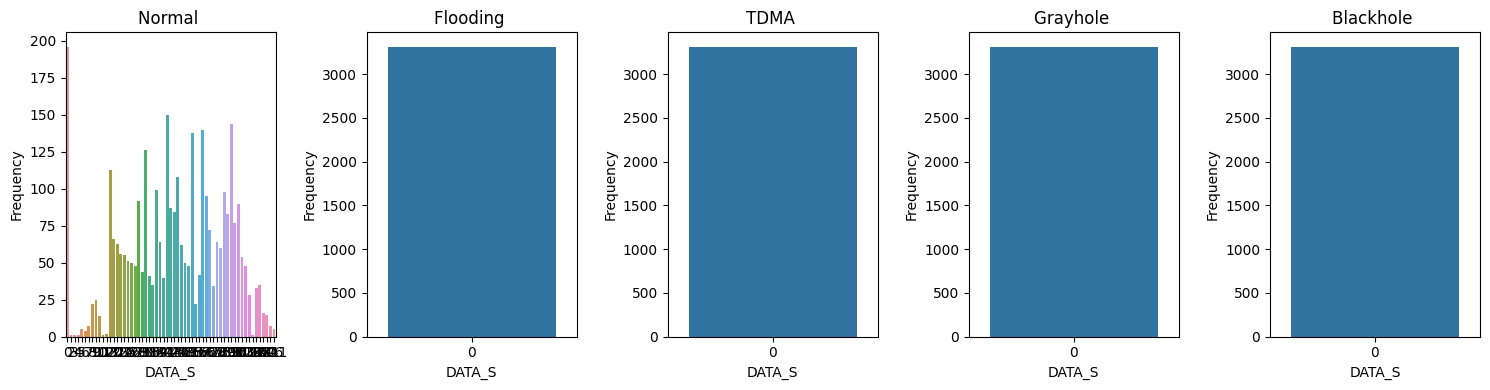

In [ ]:
#how the  feature 'DATA_S' is distributed across different categories of network attacks
# to understand the distribution of 'DATA_S' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='DATA_S', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('DATA_S')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


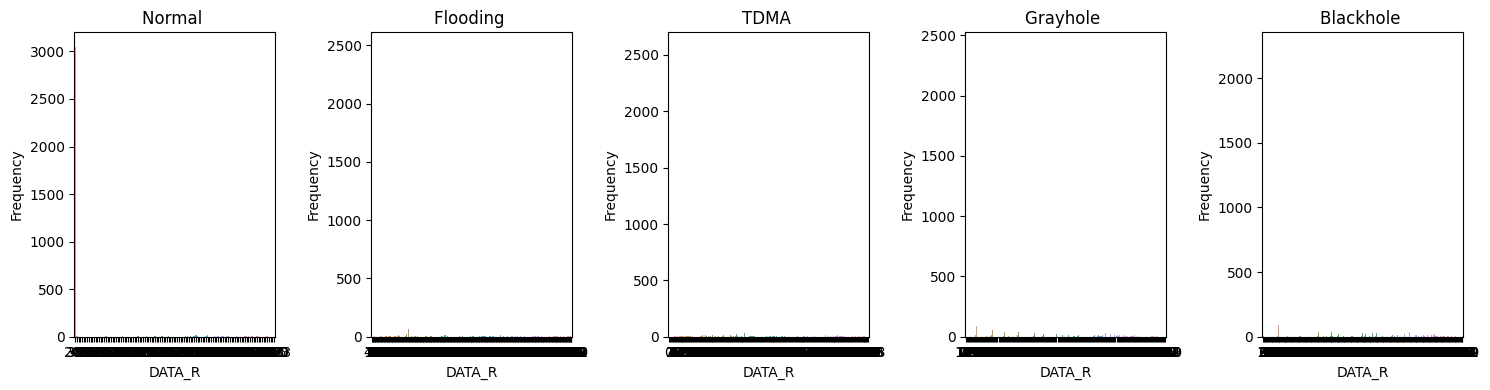

In [ ]:
#how the  feature 'DATA_R' is distributed across different categories of network attacks
# to understand the distribution of 'DATA_R' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='DATA_R', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('DATA_R')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


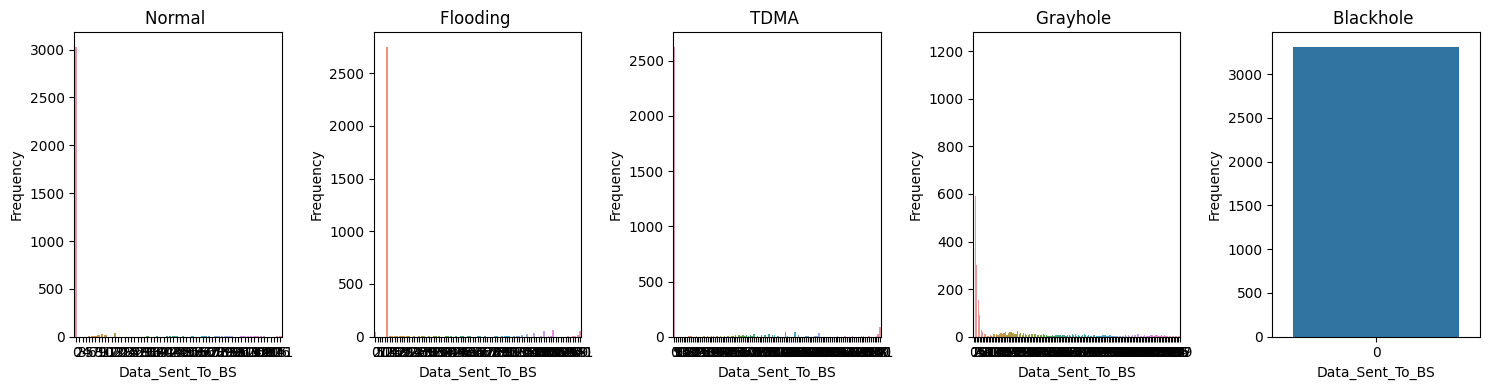

In [ ]:
#how the  feature 'Data_Sent_To_BS' is distributed across different categories of network attacks
# to understand the distribution of 'Data_Sent_To_BS' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x= 'Data_Sent_To_BS', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('Data_Sent_To_BS')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


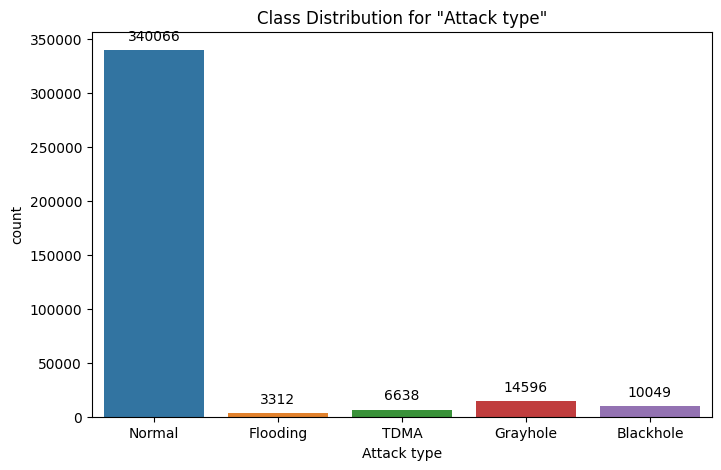

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Attack type', data=df)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Class Distribution for "Attack type"')
plt.show()


In [ ]:
#the probability that the majority of attacks are in  cluster head Is_CH=1
count_attack_ch_1 = df[(df['Attack type'].isin(['TDMA', 'Blackhole', 'Flooding', 'Grayhole'])) & (df['Is_CH'] == 1)].shape[0]
count_attack_ch_0 = df[(df['Attack type'].isin(['TDMA', 'Blackhole', 'Flooding', 'Grayhole'])) & (df['Is_CH'] == 0)].shape[0]
count_ch_0 = df[df['Is_CH'] == 0].shape[0]
count_ch_1 = df[df['Is_CH'] == 1].shape[0]
total_attacks = df[df['Attack type'].isin(['TDMA', 'Blackhole', 'Flooding', 'Grayhole'])].shape[0]

prob_attack_ch_0 = count_attack_ch_0 / total_attacks
prob_attack_ch_1 = count_attack_ch_1 / total_attacks
prob_ch_0 = count_ch_0 / df.shape[0]
prob_ch_1 = count_ch_1 / df.shape[0]

print(f'Total number of attacks: {total_attacks}')
print(f'Number of records with Attack and Is_CH=0: {count_attack_ch_0}, Probability: {prob_attack_ch_0:.2%}')
print(f'Number of records with Attack and Is_CH=1: {count_attack_ch_1}, Probability: {prob_attack_ch_1:.2%}')
print(f'Number of records with Is_CH=0: {count_ch_0}, Probability: {prob_ch_0:.2%}')
print(f'Number of records with Is_CH=1: {count_ch_1}, Probability: {prob_ch_1:.2%}')


Total number of attacks: 34595
Number of records with Attack and Is_CH=0: 423, Probability: 1.22%
Number of records with Attack and Is_CH=1: 34172, Probability: 98.78%
Number of records with Is_CH=0: 331288, Probability: 88.42%
Number of records with Is_CH=1: 43373, Probability: 11.58%


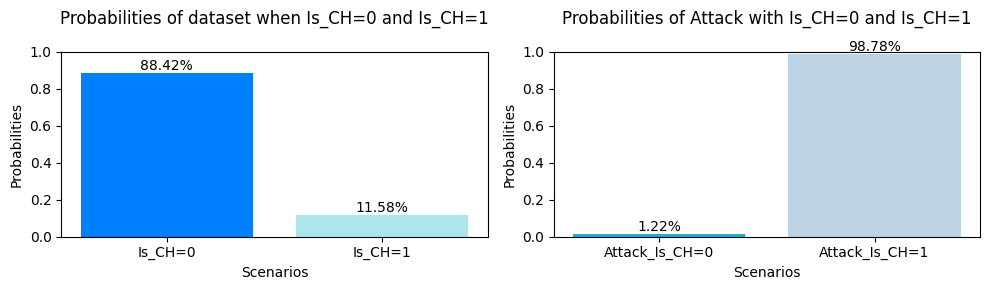

In [ ]:
labels = ['Attack_Is_CH=0', 'Attack_Is_CH=1', 'Is_CH=0', 'Is_CH=1']
probabilities = [prob_attack_ch_0, prob_attack_ch_1, prob_ch_0, prob_ch_1]
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
bars1 = axes[0].bar(labels[2:], probabilities[2:], color=['#007fff', '#ace5ee'])
axes[0].set_title('Probabilities of dataset when Is_CH=0 and Is_CH=1', pad=20)
axes[0].set_xlabel('Scenarios')
axes[0].set_ylabel('Probabilities')
axes[0].set_ylim(0, 1)


for bar, prob in zip(bars1, probabilities[2:]):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{prob:.2%}', ha='center', va='bottom')


bars2 = axes[1].bar(labels[:2], probabilities[:2], color=['#21abcd', '#bcd4e6'])
axes[1].set_title('Probabilities of Attack with Is_CH=0 and Is_CH=1', pad=20)
axes[1].set_xlabel('Scenarios')
axes[1].set_ylabel('Probabilities')
axes[1].set_ylim(0, 1)


for bar, prob in zip(bars2, probabilities[:2]):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{prob:.2%}', ha='center', va='bottom')


plt.tight_layout()
plt.show()


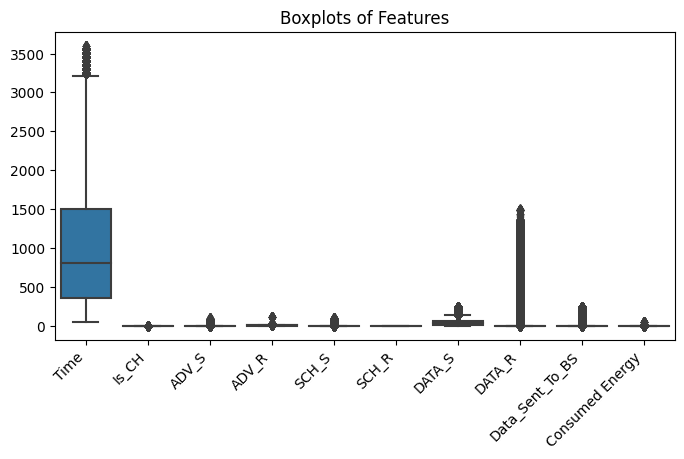

In [ ]:
features = ['Time', 'Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy']

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[features])
plt.title('Boxplots of Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
#Handling outliers
# Create a copy of the DataFrame to avoid modifying the original
df_select_copy = df_select.copy()

# Calculate Z-scores for all features except 'Attack type'
numeric_columns = df_select_copy.columns.difference(['Attack type'])
df_select_copy[numeric_columns] = zscore(df_select_copy[numeric_columns])

# Define a threshold for outliers
threshold = 3

# Find and count the number of outliers and non-outliers for each feature
outliers_counts = (df_select_copy[numeric_columns] > threshold).sum()
non_outliers_counts = (df_select_copy[numeric_columns] <= threshold).sum()

# Print the results
print("Number of outliers for each feature:")
print(outliers_counts)

print("\nNumber of non-outliers for each feature:")
print(non_outliers_counts)


Number of outliers for each feature:
ADV_R                 41
ADV_S               3065
Consumed Energy     6974
DATA_R             14858
DATA_S              7536
Data_Sent_To_BS     6700
Is_CH                  0
SCH_R                  0
SCH_S               3651
dtype: int64

Number of non-outliers for each feature:
ADV_R              374620
ADV_S              371596
Consumed Energy    367687
DATA_R             359803
DATA_S             367125
Data_Sent_To_BS    367961
Is_CH              374661
SCH_R              374661
SCH_S              371010
dtype: int64


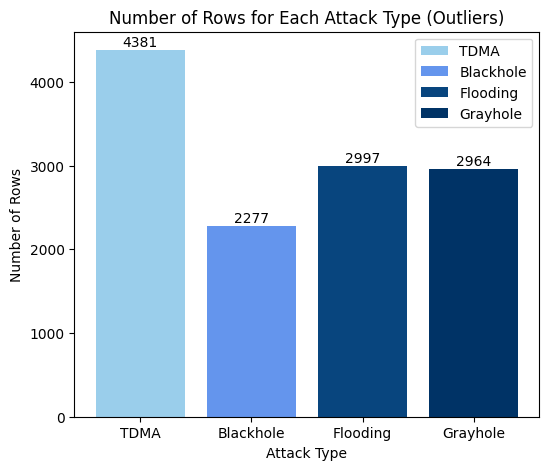

4381 observation have outlier/s and classified to be TDMA
2277 observation have outlier/s and classified to be Blackhole
2997 observation have outlier/s and classified to be Flooding
2964 observation have outlier/s and classified to be Grayhole


In [ ]:
#handling outliers
# Calculate Z-scores for numeric columns
df_select_copy[numeric_columns] = zscore(df_select_copy[numeric_columns])

# Define a threshold for outliers
threshold = 3

# Identify outliers
outliers_indices = (df_select_copy[numeric_columns] > threshold).any(axis=1)
df_select_copy['Outliers'] = outliers_indices

# Specify attack types
attack_types = ['TDMA', 'Blackhole', 'Flooding', 'Grayhole']

# Specify colors for each attack type
colors = ['#9aceeb', '#6495ed', '#08457e', '#003366']

# Create a bar plot for the shape of rows where an attack type is observed and it is an outlier
fig, ax = plt.subplots(figsize=(6, 5))

for i, attack_type in enumerate(attack_types):
    attack_rows = df_select_copy[df_select_copy['Attack type'] == attack_type]
    outlier_attack_rows = attack_rows[attack_rows['Outliers']]

    # Plot the bar with specified color
    bar = ax.bar(attack_type, outlier_attack_rows.shape[0], label=attack_type, color=colors[i])

    # Display the number of rows above each bar
    for rect in bar:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, f'{height}', ha='center', va='bottom')

ax.set_xlabel('Attack Type')
ax.set_ylabel('Number of Rows')
ax.set_title('Number of Rows for Each Attack Type (Outliers)')
ax.legend()
plt.show()

print('4381 observation have outlier/s and classified to be TDMA')
print('2277 observation have outlier/s and classified to be Blackhole')
print('2997 observation have outlier/s and classified to be Flooding')
print('2964 observation have outlier/s and classified to be Grayhole')
# OUTLIERS WAS IMPORTANT FOR US TO DETECT DIFFERENT Dos ATTACKS

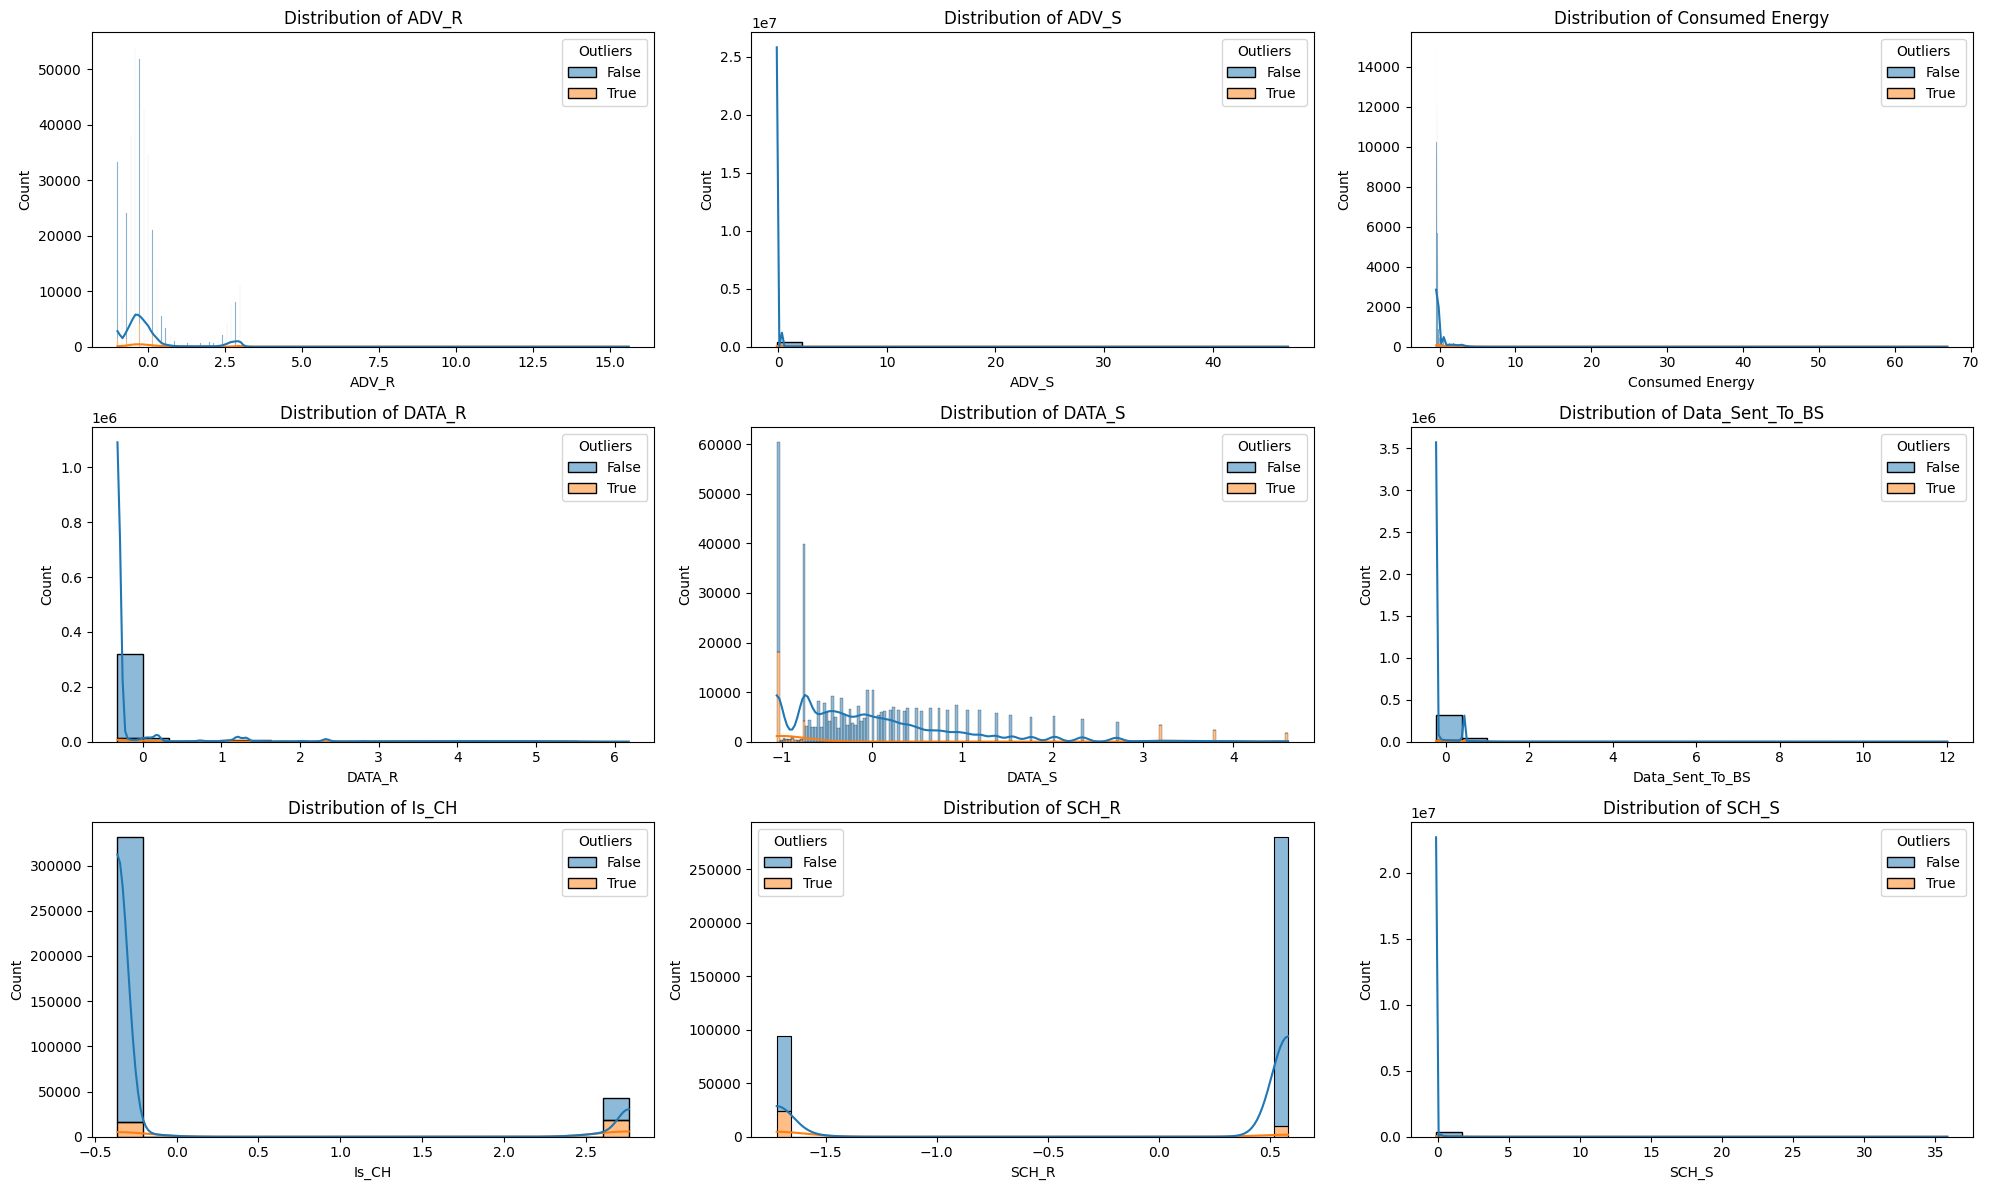

In [ ]:
#the distribution differences between outliers and non-outliers for each numeric feature.

# Convert binary columns to numeric
binary_columns = ['Is_CH', 'SCH_R']
df_select_copy[binary_columns] = df_select_copy[binary_columns].astype('int')

# Identify numeric columns (excluding 'Attack type')
numeric_columns = df_select.select_dtypes(include='number').columns.difference(['Attack type'])

# Calculate Z-scores for numeric columns
df_select_copy[numeric_columns] = zscore(df_select[numeric_columns])

# Define a threshold for outliers
threshold = 3

# Identify outliers
outliers_indices = (df_select_copy[numeric_columns] > threshold).any(axis=1)
df_select_copy['Outliers'] = outliers_indices

# Set up subplots with 3 columns per row
num_plots = len(numeric_columns)
num_rows = (num_plots + 2) // 3  # Round up to the nearest multiple of 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 4 * num_rows))

# Plot the distribution of outliers and non-outliers for each feature
for i, col in enumerate(numeric_columns):
    row_idx = i // 3
    col_idx = i % 3
    sns.histplot(data=df_select_copy, x=col, hue='Outliers', multiple='stack', kde=True, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {col}')

# Remove empty subplots
for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


##STUDYING THE FEATURES TO DECIDE THE BEST SCALING METHOD

In [ ]:
# Display the number of unique values for each feature
for feature in features:
    unique_values = df[feature].nunique()
    print(f'{feature}: {unique_values} unique values')


Time: 196 unique values
Is_CH: 2 unique values
ADV_S: 85 unique values
ADV_R: 31 unique values
SCH_S: 95 unique values
SCH_R: 2 unique values
DATA_S: 192 unique values
DATA_R: 1345 unique values
Data_Sent_To_BS: 237 unique values
Consumed Energy: 69352 unique values


In [ ]:
# Print at most 10 unique values for each feature
for col in df_select.columns:
    unique_values = df_select[col].unique()[:10]
    print(f"Unique values for {col}:")
    print(unique_values.tolist())
    if len(df_select[col].unique()) > 10:
        print("etc")
    print()


Unique values for Is_CH:
[1, 0]

Unique values for ADV_S:
[1, 0, 7, 6, 4, 8, 3, 9, 5, 16]
etc

Unique values for ADV_R:
[0, 4, 2, 1, 3, 7, 6, 5, 12, 11]
etc

Unique values for SCH_S:
[1, 0, 89, 42, 20, 43, 64, 63, 17, 29]
etc

Unique values for SCH_R:
[0, 1]

Unique values for DATA_S:
[0, 38, 41, 48, 111, 30, 23, 27, 57, 42]
etc

Unique values for DATA_R:
[1200, 0, 1230, 888, 1254, 1288, 1260, 1140, 1296, 1218]
etc

Unique values for Data_Sent_To_BS:
[48, 0, 41, 111, 38, 23, 30, 57, 27, 42]
etc

Unique values for Attack type:
['Normal', 'Flooding', 'TDMA', 'Grayhole', 'Blackhole']

Unique values for Consumed Energy:
[2.4694, 0.06957, 0.06898, 0.06673, 0.06534, 0.06717, 0.06214, 0.06662, 0.06649, 0.07903]
etc



In [ ]:
def feature_type(df, feature, threshold=10):
    unique_values = df[feature].nunique()

    if unique_values <= threshold:
        return 'Discrete'
    else:
        return 'Continuous'

features = [ 'Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy']
for feature in features:
    print(f'{feature}: {feature_type(df, feature)}')


Is_CH: Discrete
ADV_S: Continuous
ADV_R: Continuous
SCH_S: Continuous
SCH_R: Discrete
DATA_S: Continuous
DATA_R: Continuous
Data_Sent_To_BS: Continuous
Consumed Energy: Continuous


In [ ]:
def is_binary(df, feature):
    unique_values = df[feature].unique()

    # If there are only two unique values (0 and 1), it's binary
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        return True
    else:
        return False

# Example usage for your features:
features = [ 'Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy']
for feature in features:
    print(f'{feature}: {is_binary(df, feature)}')


Is_CH: True
ADV_S: False
ADV_R: False
SCH_S: False
SCH_R: True
DATA_S: False
DATA_R: False
Data_Sent_To_BS: False
Consumed Energy: False


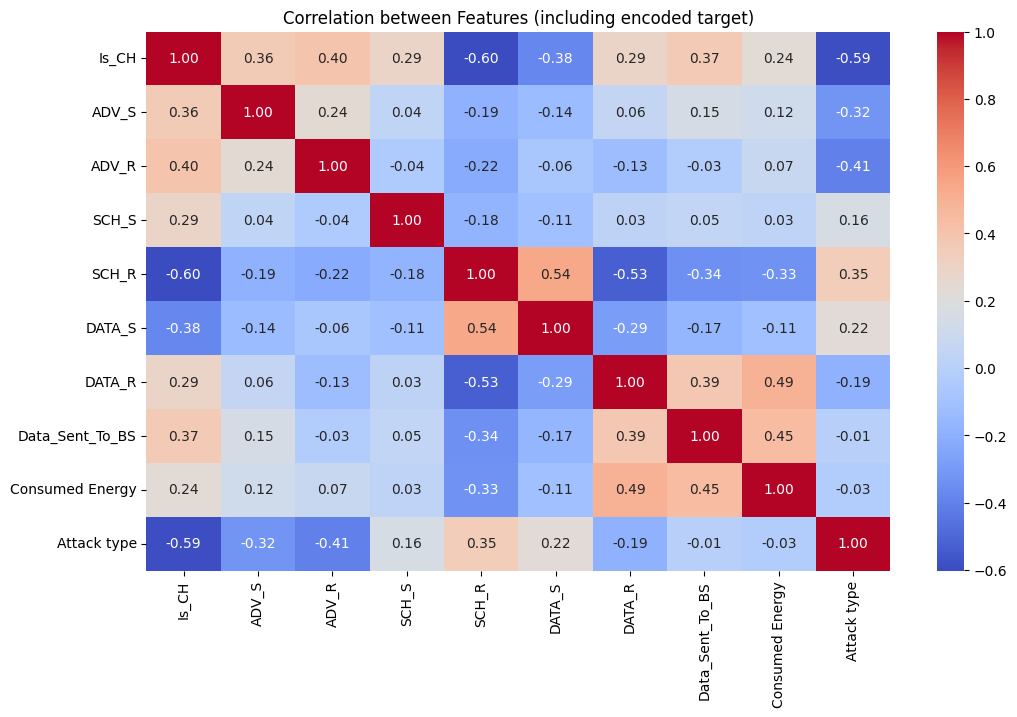

In [ ]:
df_encoded = df_select.copy()

# Encode the 'Attack type' column
label_encoder = LabelEncoder()
df_encoded['Attack type'] = label_encoder.fit_transform(df_encoded['Attack type'])

# Reorder columns to place the target variable at the last column
columns_ordered = [col for col in df_encoded.columns if col != 'Attack type'] + ['Attack type']
df_encoded = df_encoded[columns_ordered]

# Plot the correlation matrix
corr_encoded = df_encoded.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr_encoded, annot=True, cmap='coolwarm', fmt=".2f", mask=corr_encoded.isnull())
plt.title("Correlation between Features (including encoded target)")
plt.show()


# flooding_data

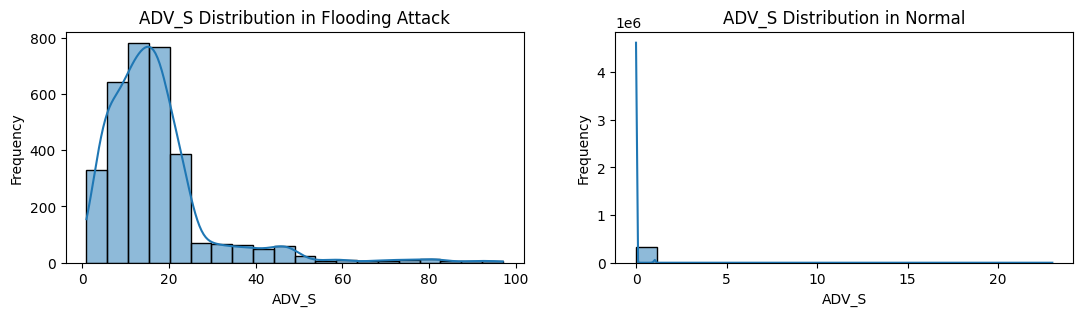

In [ ]:
flooding_data = df[df['Attack type'] == 'Flooding']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(flooding_data['ADV_S'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('ADV_S Distribution in Flooding Attack')
axes[0].set_xlabel('ADV_S')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['ADV_S'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('ADV_S Distribution in Normal')
axes[1].set_xlabel('ADV_S')
axes[1].set_ylabel('Frequency')

plt.show()


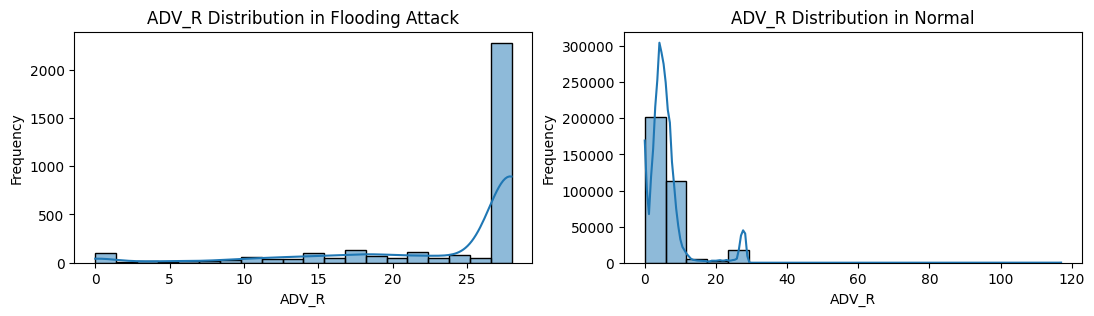

In [ ]:
flooding_data = df[df['Attack type'] == 'Flooding']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(flooding_data['ADV_R'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('ADV_R Distribution in Flooding Attack')
axes[0].set_xlabel('ADV_R')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['ADV_R'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('ADV_R Distribution in Normal')
axes[1].set_xlabel('ADV_R')
axes[1].set_ylabel('Frequency')

plt.show()


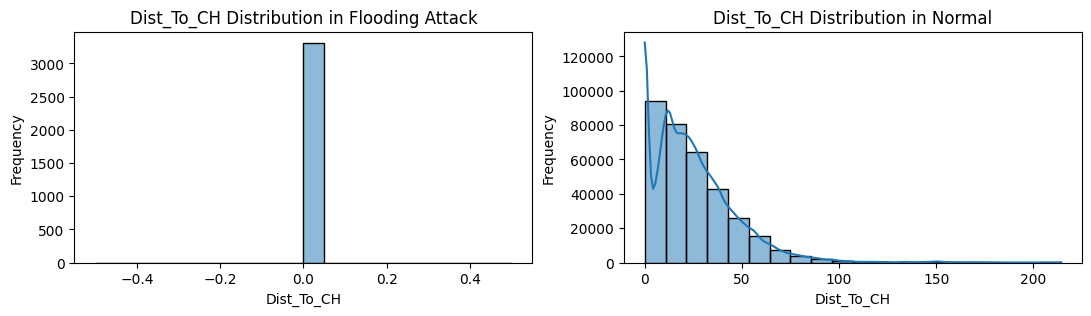

In [ ]:
flooding_data = df[df['Attack type'] == 'Flooding']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(flooding_data['Dist_To_CH'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Dist_To_CH Distribution in Flooding Attack')
axes[0].set_xlabel('Dist_To_CH')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['Dist_To_CH'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Dist_To_CH Distribution in Normal')
axes[1].set_xlabel('Dist_To_CH')
axes[1].set_ylabel('Frequency')

plt.show()


# blackhole_data

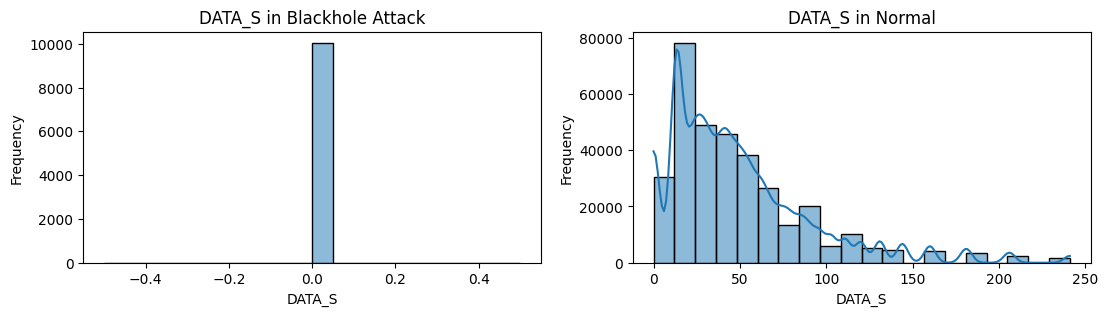

In [ ]:
blackhole_data = df[df['Attack type'] == 'Blackhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(blackhole_data['DATA_S'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('DATA_S in Blackhole Attack')
axes[0].set_xlabel('DATA_S')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['DATA_S'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('DATA_S in Normal')
axes[1].set_xlabel('DATA_S')
axes[1].set_ylabel('Frequency')

plt.show()


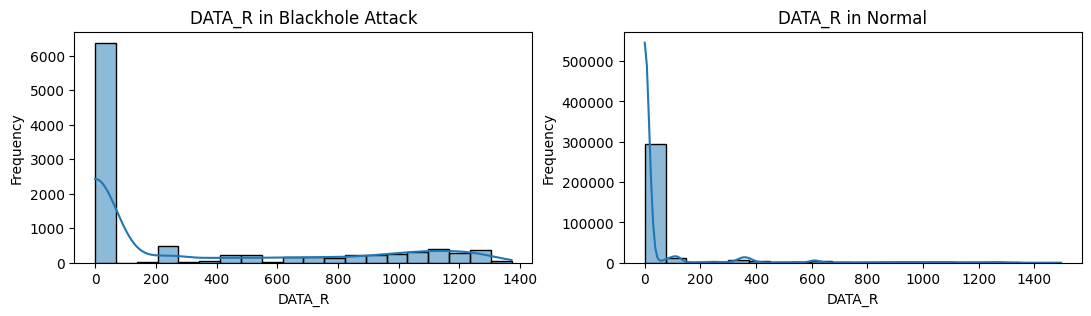

In [ ]:
blackhole_data = df[df['Attack type'] == 'Blackhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(blackhole_data['DATA_R'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('DATA_R in Blackhole Attack')
axes[0].set_xlabel('DATA_R')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['DATA_R'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('DATA_R in Normal')
axes[1].set_xlabel('DATA_R')
axes[1].set_ylabel('Frequency')

plt.show()


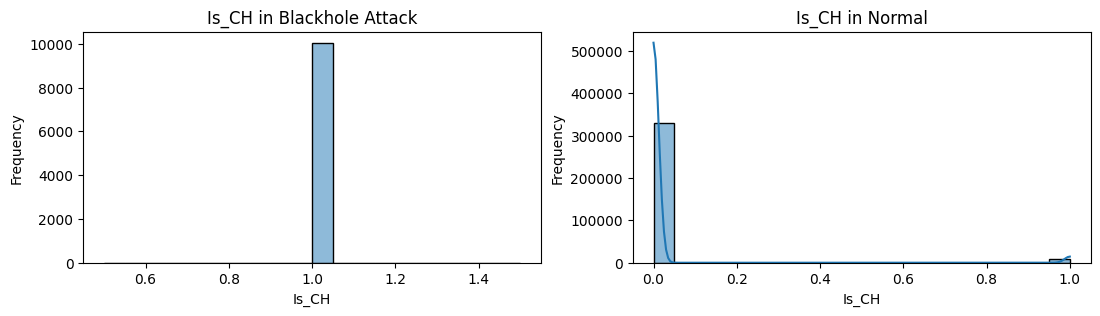

In [ ]:
blackhole_data = df[df['Attack type'] == 'Blackhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(blackhole_data['Is_CH'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Is_CH in Blackhole Attack')
axes[0].set_xlabel('Is_CH')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['Is_CH'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Is_CH in Normal')
axes[1].set_xlabel('Is_CH')
axes[1].set_ylabel('Frequency')

plt.show()


# Grayhole_data

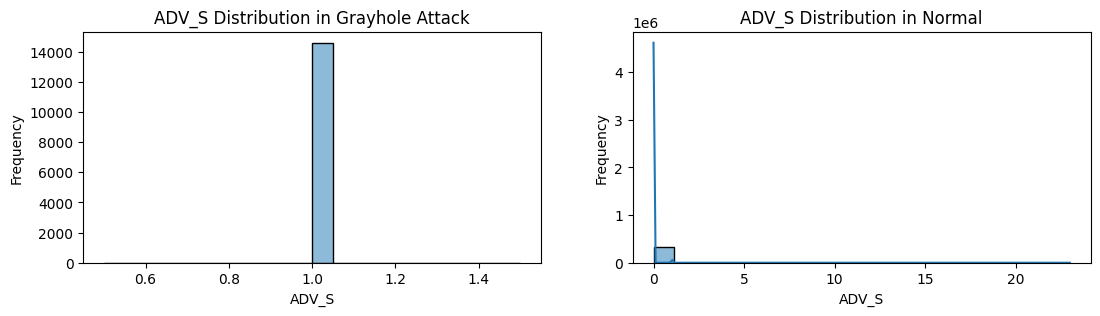

In [ ]:
grayhole_data = df[df['Attack type'] == 'Grayhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(grayhole_data['ADV_S'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('ADV_S Distribution in Grayhole Attack')
axes[0].set_xlabel('ADV_S')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['ADV_S'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('ADV_S Distribution in Normal')
axes[1].set_xlabel('ADV_S')
axes[1].set_ylabel('Frequency')

plt.show()


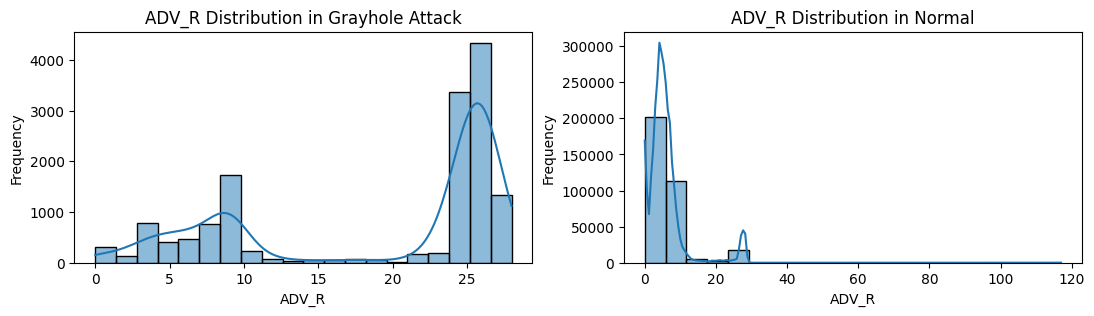

In [ ]:
grayhole_data = df[df['Attack type'] == 'Grayhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(grayhole_data['ADV_R'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('ADV_R Distribution in Grayhole Attack')
axes[0].set_xlabel('ADV_R')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['ADV_R'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('ADV_R Distribution in Normal')
axes[1].set_xlabel('ADV_R')
axes[1].set_ylabel('Frequency')

plt.show()


# TDMA

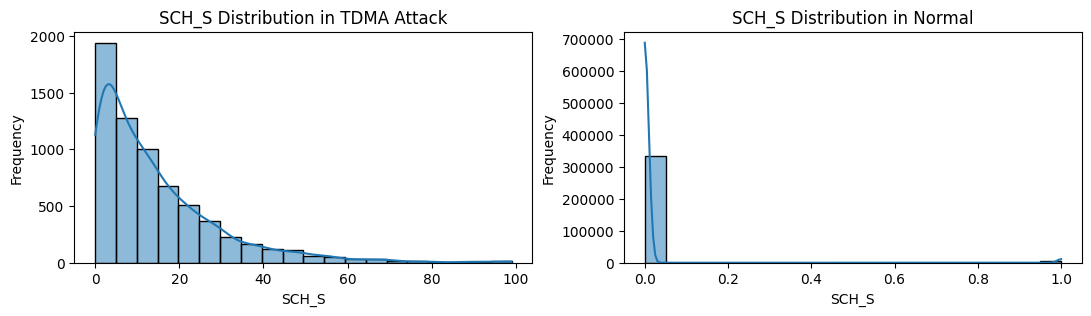

In [ ]:
tdma_data = df[df['Attack type'] == 'TDMA']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(tdma_data['SCH_S'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('SCH_S Distribution in TDMA Attack')
axes[0].set_xlabel('SCH_S')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['SCH_S'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('SCH_S Distribution in Normal')
axes[1].set_xlabel('SCH_S')
axes[1].set_ylabel('Frequency')

plt.show()


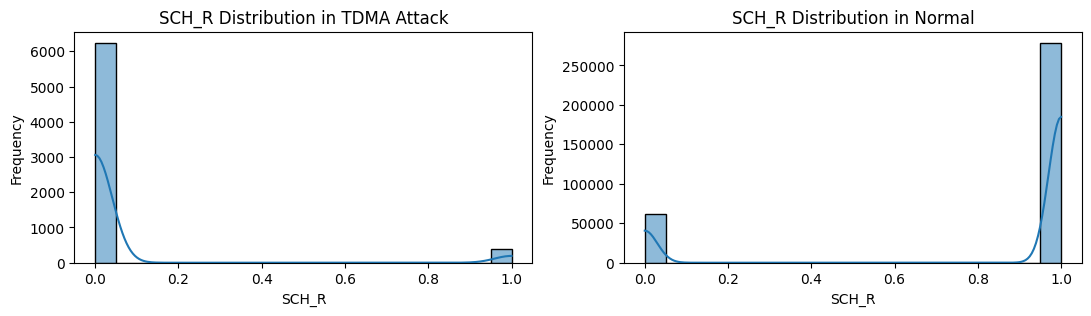

In [ ]:
tdma_data = df[df['Attack type'] == 'TDMA']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(tdma_data['SCH_R'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('SCH_R Distribution in TDMA Attack')
axes[0].set_xlabel('SCH_R')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['SCH_R'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('SCH_R Distribution in Normal')
axes[1].set_xlabel('SCH_R')
axes[1].set_ylabel('Frequency')

plt.show()


#Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df_select.drop('Attack type', axis=1)
y = df_select['Attack type']

# Split the data into training, validation, and test sets
# Use test_size=0.2 for an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Further split the temporary set into validation and test sets
# Use test_size=0.5 for a 50-50 split between validation and test sets
X_valid, X_train, y_valid, y_train = train_test_split(X_train, y_train, test_size=0.3, random_state=42, shuffle=False)

# Print the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (89919, 9)
X_valid shape: (209809, 9)
X_test shape: (74933, 9)
y_train shape: (89919,)
y_valid shape: (209809,)
y_test shape: (74933,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Min-Max scaling for continuous features
continuous_features = [ 'ADV_S', 'ADV_R', 'SCH_S', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy']
binary_features = ['Is_CH', 'SCH_R']
minmax_scaler = MinMaxScaler()

# Scale continuous features
data_train_continuous_scaled = minmax_scaler.fit_transform(X_train[continuous_features])
data_valid_continuous_scaled = minmax_scaler.transform(X_valid[continuous_features])
data_test_continuous_scaled = minmax_scaler.transform(X_test[continuous_features])

# Create DataFrames for scaled continuous features
data_train_continuous_scaled_df = pd.DataFrame(data_train_continuous_scaled, columns=continuous_features)
data_valid_continuous_scaled_df = pd.DataFrame(data_valid_continuous_scaled, columns=continuous_features)
data_test_continuous_scaled_df = pd.DataFrame(data_test_continuous_scaled, columns=continuous_features)

# Reset index before concatenation
X_train_reset_index = X_train[binary_features].reset_index(drop=True)
X_valid_reset_index = X_valid[binary_features].reset_index(drop=True)
X_test_reset_index = X_test[binary_features].reset_index(drop=True)

# Concatenate binary features with scaled continuous features and labels without shuffling
data_train = pd.concat([X_train_reset_index, data_train_continuous_scaled_df, y_train.reset_index(drop=True)], axis=1)
data_valid = pd.concat([X_valid_reset_index, data_valid_continuous_scaled_df, y_valid.reset_index(drop=True)], axis=1)
data_test = pd.concat([X_test_reset_index, data_test_continuous_scaled_df, y_test.reset_index(drop=True)], axis=1)
data_train=data_train.drop('Attack type' , axis=1)
data_valid=data_valid.drop('Attack type' , axis=1)
data_test=data_test.drop('Attack type' , axis=1)

In [ ]:
X_train.head()

,Is_CH,ADV_S,ADV_R,SCH_S,SCH_R,DATA_S,DATA_R,Data_Sent_To_BS,Consumed Energy
209809,0,0,6,0,1,51,0,0,2.39935
209810,0,0,6,0,1,96,0,0,0.16036
209811,0,0,6,0,1,55,0,0,0.09489
209812,0,0,6,0,1,96,0,0,0.16102
209813,0,0,6,0,1,96,0,0,0.16427


In [ ]:
data_train.head()

,Is_CH,SCH_R,ADV_S,ADV_R,SCH_S,DATA_S,DATA_R,Data_Sent_To_BS,Consumed Energy
0,0,1,0.0,0.214286,0.0,0.211618,0.0,0.0,0.484563
1,0,1,0.0,0.214286,0.0,0.398340,0.0,0.0,0.032386
2,0,1,0.0,0.214286,0.0,0.228216,0.0,0.0,0.019164
3,0,1,0.0,0.214286,0.0,0.398340,0.0,0.0,0.032519
4,0,1,0.0,0.214286,0.0,0.398340,0.0,0.0,0.033175


In [ ]:
le = LabelEncoder()

# Encode labels
target_train = le.fit_transform(y_train)
target_test = le.transform(y_test)
target_valid = le.transform(y_valid)

#the whole data sets X and Y
train_data = pd.concat([X_train, pd.Series(target_train, name='Attack type')], axis=1)
test_data = pd.concat([X_test, pd.Series(target_test, name='Attack type')], axis=1)
valid_data = pd.concat([X_valid, pd.Series(target_valid, name='Attack type')], axis=1)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Define the under-sampler
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)


# Apply under-sampling to the training data
data_train_resampled, target_train_resampled = under_sampler.fit_resample(data_train, target_train)

# Print the shapes of the resampled datasets
print(f"X_train_resampled shape: {data_train_resampled.shape}")
print(f"target_train_resampled shape: {target_train_resampled.shape}")

X_train_resampled shape: (4835, 9)
target_train_resampled shape: (4835,)


In [ ]:
#show the shape of the whole data
print(train_data.shape,' ',test_data.shape,' ',valid_data.shape)

(179838, 10)   (149866, 10)   (209809, 10)
